<a href="https://colab.research.google.com/github/Rafikul10/Maleria_Detector/blob/main/Maleria_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [102]:
IMAGE_SIZE=[224,224]

train_path="drive/MyDrive/ColabNotebooks/Dataset/Train"
valid_path="drive/MyDrive/ColabNotebooks/Dataset/Test"

In [103]:
vgg19=VGG19(input_shape=IMAGE_SIZE + [3],weights="imagenet",include_top=False)

In [104]:
for layer in vgg19.layers:
    layer.trainable = False

In [105]:
folders= glob("drive/MyDrive/ColabNotebooks/Dataset/Train/*")

In [106]:
folders

['drive/MyDrive/ColabNotebooks/Dataset/Train/Parasite',
 'drive/MyDrive/ColabNotebooks/Dataset/Train/Uninfected']

In [107]:
x = Flatten()(vgg19.output)

In [108]:
prediction = Dense(len(folders), activation='softmax')(x)

In [109]:
model = Model(inputs=vgg19.input, outputs=prediction)


In [110]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [111]:
from keras.layers import MaxPooling2D

In [112]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [113]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [114]:
from keras.preprocessing.image import ImageDataGenerator

In [115]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [116]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [117]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/ColabNotebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [118]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/ColabNotebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [119]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 6s 428ms/step - loss: 0.6291 - accuracy: 0.6466 - val_loss: 0.8158 - val_accuracy: 0.3955
Epoch 2/50
13/13 [==============================] - 5s 405ms/step - loss: 0.4787 - accuracy: 0.7620 - val_loss: 0.8472 - val_accuracy: 0.4403
Epoch 3/50
13/13 [==============================] - 5s 404ms/step - loss: 0.4231 - accuracy: 0.8029 - val_loss: 1.1805 - val_accuracy: 0.3955
Epoch 4/50
13/13 [==============================] - 5s 403ms/step - loss: 0.4082 - accuracy: 0.8125 - val_loss: 0.7375 - val_accuracy: 0.4925
Epoch 5/50
13/13 [==============================] - 5s 410ms/step - loss: 0.3466 - accuracy: 0.8365 - val_loss: 0.6786 - val_accuracy: 0.6045
Epoch 6/50
13/13 [==============================] - 5s 404ms/step - loss: 0.2573 - accuracy: 0.9062 - val_loss: 0.7585 - val_accuracy: 0.5896
Epoch 7/50
13/13 [==============================] - 5s 406ms/step - loss: 0.2421 - accuracy: 0.9038 - val_loss: 0.7029 - val_accuracy: 0.6194
Epoch 

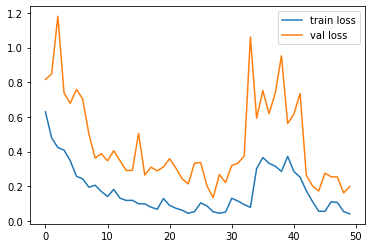

<Figure size 432x288 with 0 Axes>

In [120]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

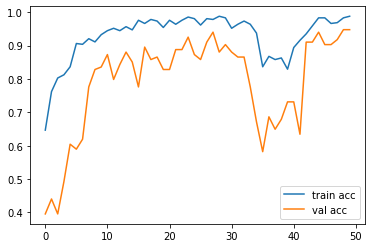

<Figure size 432x288 with 0 Axes>

In [121]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [122]:
# save it as a h5 file
from keras.models import load_model

model.save('model_vgg19.h5')

In [123]:
y_pred = model.predict(test_set)

In [124]:
y_pred

array([[1.00000000e+00, 4.47145654e-09],
       [2.48282347e-02, 9.75171745e-01],
       [1.00000000e+00, 5.59530235e-08],
       [9.99994755e-01, 5.29590216e-06],
       [1.00000000e+00, 9.47788403e-10],
       [9.99999881e-01, 1.76263669e-07],
       [8.97130836e-03, 9.91028726e-01],
       [9.99844551e-01, 1.55396105e-04],
       [9.17861238e-04, 9.99082088e-01],
       [8.53030503e-01, 1.46969467e-01],
       [1.00000000e+00, 2.45653799e-17],
       [9.92420852e-01, 7.57915666e-03],
       [3.62808187e-03, 9.96371984e-01],
       [1.00000000e+00, 1.00521067e-12],
       [1.00000000e+00, 1.87248368e-08],
       [9.99632835e-01, 3.67153698e-04],
       [9.24508393e-01, 7.54916444e-02],
       [9.99999642e-01, 4.09528269e-07],
       [9.99992013e-01, 7.93831077e-06],
       [1.00000000e+00, 2.50270693e-09],
       [1.40530674e-03, 9.98594701e-01],
       [1.00000000e+00, 3.56261773e-24],
       [4.85402793e-02, 9.51459706e-01],
       [9.99667168e-01, 3.32866621e-04],
       [9.996401

In [125]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [126]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0])

In [127]:
from keras.models import load_model
from keras.preprocessing import image

In [128]:
model=load_model('model_vgg19.h5')

In [129]:
img=image.load_img("drive/MyDrive/ColabNotebooks/Dataset/Test/Uninfected/2.png",target_size=(224,224))

In [130]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [131]:
x.shape

(224, 224, 3)

In [132]:
x=x/255

In [133]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [134]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [135]:
a=np.argmax(model.predict(img_data), axis=1)

In [136]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [ ]:
#Observation: After make the complete model i checked the model by giving 
#test data set and it's predicted correct and accuracy of this model is 98%